# Ozone Data Gathering (sample station: BETN073)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-7) for the station "BETN073:43N073 - VEZIN" in Belgium.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0110000700100dymax.1-1-1992.31-12-2012"
fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETM7050000700100dymax.1-1-1999.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0040000700100dymax.1-1-2001.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0060000700100dymax.1-1-2002.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BE0312A0000700100dymax.1-1-1997.31-12-1998"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETAND30000700100dymax.1-1-2001.31-12-2001"

columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))

df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])

### Daily time-series (from 1-1-1990 to 31-12-2011)
Initialization of an empty multi-variate time-series frame.
*Note:'Var1' is added as a placeholder for future time-series data augmentation (with weather data for a station).*

In [124]:
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
#ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

Min date: 1999-01-01 00:00:00, Max Date: 2012-12-31 00:00:00


### Filling empty ts with O3 data (Valid readings: {0}, invalid readings {-1, 0} as Nans)
Only valid ozone data is inserted into the time-series.

In [125]:
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, 'O3'] = row[columnIndex] # Set value to time-series

### First month data
CSV vs time-series data-frame (first 31 days of January 1990).

In [126]:
# First 31 dayCSV vs time-series data-frame (last month).s of CSV data
df1.head(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
0,1999-01-01,34.875,1,53.5,1,70.714,1,58.833,1,57.333,...,63.286,1,57.25,1,54.714,1,24.125,1,46.5,1


In [127]:
# First 31 days of time-series data
ts.head(31)

,O3
1999-01-01,34.875
1999-01-02,53.500
1999-01-03,70.714
1999-01-04,58.833
1999-01-05,57.333
1999-01-06,12.000
1999-01-07,48.833
1999-01-08,61.167
1999-01-09,46.167
1999-01-10,20.625


### Last month data
CSV vs time-series data-frame (31 days of December 2011).

In [128]:
# Last 31 days of CSV data
df1.tail(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
167,2012-12-01,44.75,1,57.375,1,42.5,1,45.375,1,47.75,...,75.25,1,56.125,1,69.25,1,79.25,1,70.375,1


In [129]:
# Last 31 days of time-series data
ts.tail(31)

,O3
2012-12-01,44.750
2012-12-02,57.375
2012-12-03,42.500
2012-12-04,45.375
2012-12-05,47.750
2012-12-06,56.375
2012-12-07,47.125
2012-12-08,19.875
2012-12-09,59.375
2012-12-10,61.125


Histogram (50 bins) and boxplot of all the O3 values of the first year.

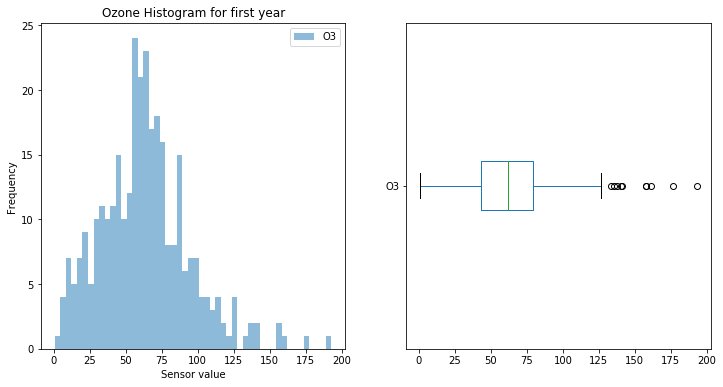

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for first year')
ax[0].grid(True)
ts.head(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.head(365).plot.box(vert=False, ax = ax[1]);

Histogram (50 bins) and boxplot of all the O3 values of the last year.

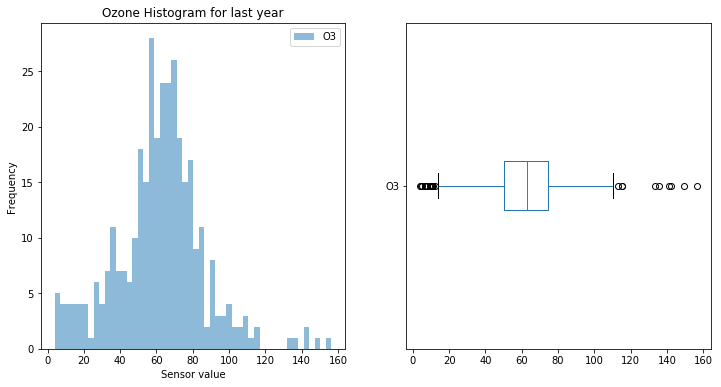

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for last year')
ax[0].grid(True)
ts.tail(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.tail(365).plot.box(vert=False, ax = ax[1]);

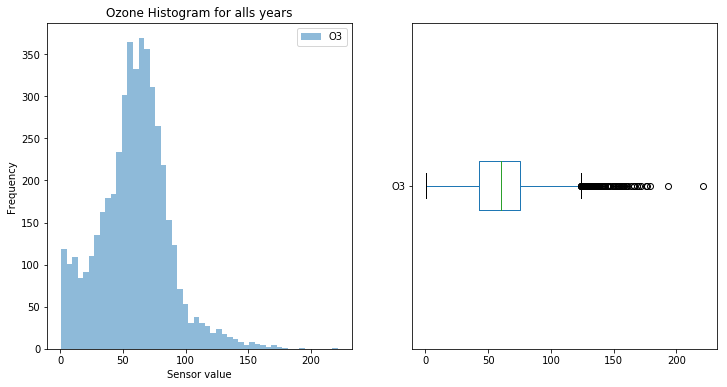

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for alls years')
ax[0].grid(True)
ts.plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.plot.box(vert=False, ax = ax[1]);

Some basic descriptive statistics for 1990:

In [133]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.head(365).describe()

,O3
count,319.000000
mean,63.366323
std,31.032821
min,0.750000
25%,43.250000
50%,61.625000
75%,79.062500
max,193.000000


In [134]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.tail(365).describe()

,O3
count,345.000000
mean,61.819290
std,24.366239
min,4.000000
25%,50.000000
50%,63.000000
75%,74.625000
max,156.375000


In [135]:
ts.describe()

,O3
count,4682.000000
mean,59.354860
std,27.987501
min,0.750000
25%,42.625000
50%,60.250000
75%,75.125000
max,221.167000


Time-series plot of O3, first 365 days:

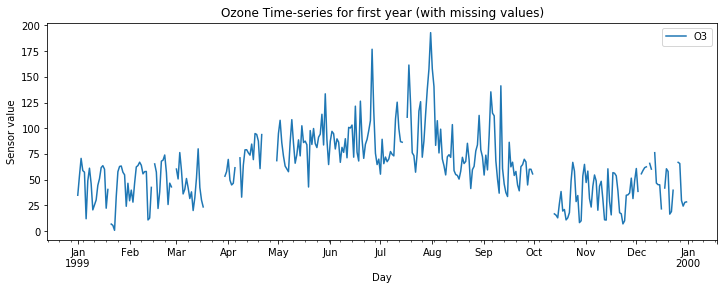

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for first year (with missing values)')
ax.grid(True)
ts.head(365).plot(ax = ax);

Time-series plot of O3, last 365 days (with missing data):

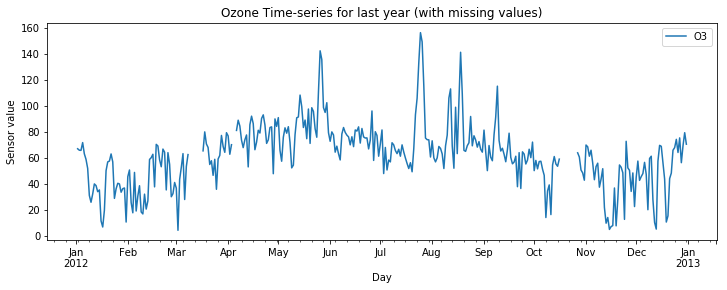

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for last year (with missing values)')
ax.grid(True)
ts.tail(365).plot(ax = ax);

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

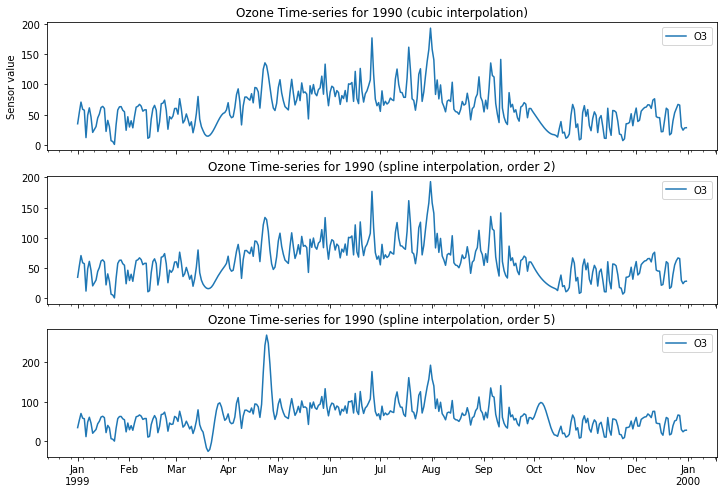

In [138]:
ts2a = ts.interpolate(method='cubic',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='spline',order=2,limit=20,limit_direction='both')
ts2c = ts.interpolate(method='spline',order=5,limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=False)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (cubic interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (spline interpolation, order 2)')
ax[2].set_title('Ozone Time-series for 1990 (spline interpolation, order 5)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

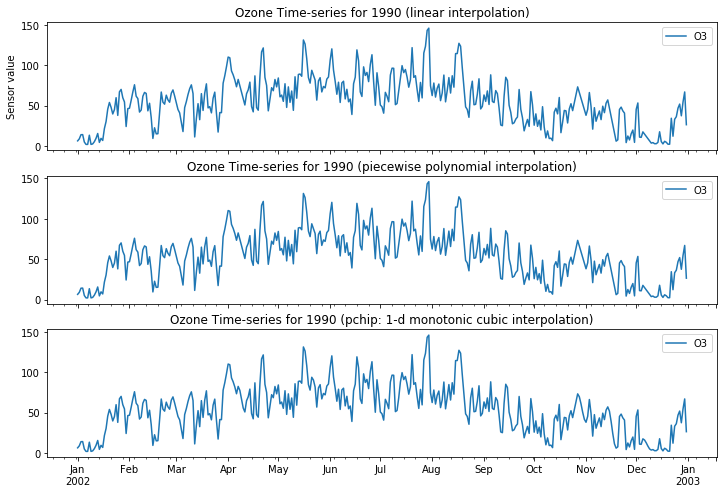

In [56]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

# Meta-data for all O3 stations

Reading the 'BE-meta.xml' file, for the stations in Belgium.
All the available XML tags:

In [57]:
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()
xml = ET.tostring(root, encoding='utf8', method='xml')
 
xml_root = etree.fromstring(xml)
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
 
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
 
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1], ', '.join(attribs) if len(attribs) > 0 else '-'))

0: airbase [{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation]
    1: country [-]
        2: country_name [-]
        2: country_iso_code [-]
        2: country_eu_member [-]
        2: network [-]
            3: network_code [-]
            3: network_name [-]
            3: network_short_name [-]
            3: network_start_date [-]
            3: network_time_reference_basis [-]
            3: network_type [-]
            3: network_manager [-]
                4: organization [-]
                    5: organization_name [-]
                    5: organization_address [-]
                    5: organization_city [-]
                    5: organization_phone_number [-]
                    5: organization_fax_number [-]
                4: person [-]
                    5: person_last_name [-]
                    5: person_first_name [-]
        2: station [Id]
            3: station_european_code [-]
            3: network_info [-]
                4: network_code [-

List of all the measurement stations in Belgium:

In [3]:
for child in root:    
    for child1 in child:        
        print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))

tag: country_name, attrib: {}, text: BELGIUM
tag: country_iso_code, attrib: {}, text: BE
tag: country_eu_member, attrib: {}, text: Y
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: station, attrib: {'Id': 'BEMAT01:00AT01 - ANTWERPEN'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE01:00BE01 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE02:00BE02 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE06:00BE06 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE07:00BE07 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE08:00BE08 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE09:00BE09 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE10:00BE10 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE11:00BE11 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE15:00BE15 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMEK0

Example browsing the meta-data of the station 73 - VEZIN in Belgium:

In [3]:
for child in root:    
    for child1 in child:          
        if child1.tag == "station":
           # print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))
#             if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
            if child1.attrib['Id']=="BETN012:44N012 - MOERKERKE":  
                for child2 in child1:
#                     print ("tag: {}, attrib: {}, text: {}".format(child2.tag, child2.attrib, child2.text))
                    if child2.tag == "station_info":
                        for child3 in child2:
                            print ("tag: {}, attrib: {}, text: {}".format(child3.tag, child3.attrib, child3.text))
#                          if child2.attrib['component'] == "Ozone (air) - UV absorption":
#                             for child3 in child2:
#                                 if child3.tag == "statistics":
#                                     if child3.attrib['Year'] == "2010":
#                                         for child4 in child3:
#                                             if child4.tag == "statistics_average_group":
#                                                 if child4.attrib['value'] == "day":
#                                                     for child5 in child4:
#                                                         if child5.tag == "statistic_set":
#                                                             if child5.attrib['type'] == "General":
#                                                                 for child6 in child5:#                                                                     
#                                                                     if child6.tag == "statistic_result":                                                                        
#                                                                         print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
#                                                                         for child7 in child6:
#                                                                             print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))

tag: EMEP_station, attrib: {}, text: yes
tag: station_local_code, attrib: {}, text: 44N012
tag: station_airbase_code, attrib: {}, text: BE0033R
tag: station_name, attrib: {}, text: 44N012 - MOERKERKE
tag: station_nuts_level0, attrib: {}, text: BE
tag: station_nuts_level1, attrib: {}, text: 2
tag: station_nuts_level2, attrib: {}, text: 5
tag: station_nuts_level3, attrib: {}, text: 1
tag: sabe_country_code, attrib: {}, text: BE
tag: sabe_unit_code, attrib: {}, text: BE231006
tag: sabe_unit_name, attrib: {}, text: Damme
tag: station_start_date, attrib: {}, text: 1977-11-01
tag: station_latitude_decimal_degrees, attrib: {}, text: 51.255100
tag: station_longitude_decimal_degrees, attrib: {}, text: 3.361292
tag: station_latitude_dms, attrib: {}, text: +051°15'18.36"
tag: station_longitude_dms, attrib: {}, text: +003°21'40.65"
tag: station_altitude, attrib: {}, text: 3
tag: type_of_station, attrib: {}, text: Background
tag: station_type_of_area, attrib: {}, text: rural
tag: station_characteri

Print all stations with "BETN" prefix (rural background stations). Store lon/lat in dictionary.

In [9]:
stationLonLat = {}
for child in root:    
    for child1 in child:          
        if child1.tag == "station":           
            if child1.attrib['Id'].startswith("BET"):
                for child2 in child1:
                    if child2.tag == "station_info":
                        lon = 0.0
                        lat = 0.0
                        for child3 in child2:         
                            if child3.tag == "station_latitude_decimal_degrees":
                                lat = child3.text
                            if child3.tag == "station_longitude_decimal_degrees":
                                lon = child3.text
                        print ("{} (lon: {}, lat: {})".format(child1.attrib['Id'][:7], lon, lat))
                        stationLonLat[child1.attrib['Id'][:7]] = (float(lon), float(lat))

BETGK11 (lon: 5.519013, lat: 50.932037)
BETAND3 (lon: 4.310284, lat: 50.820530)
BETB004 (lon: 4.347322, lat: 50.851353)
BETB005 (lon: 4.377467, lat: 50.840668)
BETB006 (lon: 4.373122, lat: 50.839172)
BETB011 (lon: 4.287072, lat: 50.858574)
BETMEU1 (lon: 4.391450, lat: 50.895645)
BETN043 (lon: 4.381697, lat: 50.884106)
BETR001 (lon: 4.332555, lat: 50.850208)
BETR002 (lon: 4.383452, lat: 50.825672)
BETR012 (lon: 4.357275, lat: 50.797178)
BETWOL1 (lon: 4.424436, lat: 50.857121)
BETWOL2 (lon: 4.424436, lat: 50.857121)
BETM802 (lon: 4.423125, lat: 51.261524)
BETN015 (lon: 4.590067, lat: 51.260220)
BETN016 (lon: 5.162686, lat: 51.234192)
BETN025 (lon: 5.091442, lat: 51.064537)
BETN026 (lon: 5.140392, lat: 51.083100)
BETN027 (lon: 5.605355, lat: 51.134262)
BETN035 (lon: 4.836336, lat: 50.978088)
BETN040 (lon: 4.223933, lat: 50.768684)
BETN041 (lon: 4.222928, lat: 50.768379)
BETN045 (lon: 5.367084, lat: 50.940262)
BETN046 (lon: 5.617572, lat: 50.882847)
BETN054 (lon: 5.101875, lat: 50.712257)


In [10]:
print("stationLonLat:", stationLonLat)

stationLonLat: {'BETGK11': (5.519013, 50.932037), 'BETAND3': (4.310284, 50.82053), 'BETB004': (4.347322, 50.851353), 'BETB005': (4.377467, 50.840668), 'BETB006': (4.373122, 50.839172), 'BETB011': (4.287072, 50.858574), 'BETMEU1': (4.39145, 50.895645), 'BETN043': (4.381697, 50.884106), 'BETR001': (4.332555, 50.850208), 'BETR002': (4.383452, 50.825672), 'BETR012': (4.357275, 50.797178), 'BETWOL1': (4.424436, 50.857121), 'BETWOL2': (4.424436, 50.857121), 'BETM802': (4.423125, 51.261524), 'BETN015': (4.590067, 51.26022), 'BETN016': (5.162686, 51.234192), 'BETN025': (5.091442, 51.064537), 'BETN026': (5.140392, 51.0831), 'BETN027': (5.605355, 51.134262), 'BETN035': (4.836336, 50.978088), 'BETN040': (4.223933, 50.768684), 'BETN041': (4.222928, 50.768379), 'BETN045': (5.367084, 50.940262), 'BETN046': (5.617572, 50.882847), 'BETN054': (5.101875, 50.712257), 'BETR010': (4.427158, 50.86565), 'BETR020': (4.435453, 50.941933), 'BETR801': (4.430547, 51.210197), 'BETR802': (4.430547, 51.210197), 'BET

Store an ordered dictionary for the next closest station of the current:

In [6]:
import math
from collections import OrderedDict

def getDistanceDegrees(station1, station2):
    return math.sqrt((stationLonLat[station1][0] -stationLonLat[station2][0])**2 + (stationLonLat[station1][1] -stationLonLat[station2][1])**2)

distanceStationToStation = {}

for station1 in stationLonLat.keys():
    distancesToStation = {}
    for station2 in stationLonLat.keys():
        if station1 != station2:
            distancesToStation[station2] = getDistanceDegrees(station1, station2) 
    distanceStationToStation[station1] = OrderedDict(sorted(distancesToStation.items(), key=lambda t: t[1]))
         

In [7]:
distanceStationToStation["BETN073"].keys()

odict_keys(['BEVN073', 'BEMNMC6', 'BEMAND1', 'BEMNM01', 'BETN054', 'BEVLAN1', 'BEMTIE1', 'BEMN093', 'BETN093', 'BEVN093', 'BEPN093', 'BEMN063', 'BETN063', 'BEVN063', 'BEPN063', 'BEB0225', 'BEMENG1', 'BEB0940', 'BETR240', 'BEVR240', 'BEB0227', 'BEB0226', 'BETR510', 'BETN035', 'BEVN035', 'BEPN035', 'BEB0504', 'BEB0218', 'BEMCHA2', 'BETR502', 'BEMJMP1', 'BEB0923', 'BETR223', 'BEMCHA1', 'BEB0901', 'BETR501', 'BEVR501', 'BEB0509', 'BEB0505', 'BEMHAS1', 'BEB0514', 'BEVR231', 'BEMN100', 'BETN100', 'BEVN100', 'BEPN100', 'BELTS12', 'BEVTS12', 'BE0443A', 'BEMCHA6', 'BEVN025', 'BETN025', 'BETH201', 'BEVTS20', 'BELTS20', 'BELTS21', 'BETR511', 'BEPR511', 'BEMN045', 'BEBN045', 'BETN045', 'BELTS07', 'BETE811', 'BEMTV01', 'BEB0202', 'BETR222', 'BEPR222', 'BEVR522', 'BEB0506', 'BEB0206', 'BEMLIE1', 'BETN026', 'BEMTES5', 'BEMCHA7', 'BETR512', 'BETR201', 'BEVR201', 'BEMLIE4', 'BELLD01', 'BETE813', 'BELTS06', 'BELLD02', 'BEPSZ02', 'BELSZ02', 'BEB0834', 'BEMANG1', 'BETM204', 'BEBSZ01', 'BELSZ01', 'BEPSZ01'

In [8]:
distanceStationToStation["BETN073"]

OrderedDict([('BEVN073', 0.0),
             ('BEMNMC6', 0.032740777327357216),
             ('BEMAND1', 0.053884617109152856),
             ('BEMNM01', 0.12255483043927587),
             ('BETN054', 0.2384026903392695),
             ('BEVLAN1', 0.2694563422022228),
             ('BEMTIE1', 0.305556435090148),
             ('BEMN093', 0.33611091541929794),
             ('BETN093', 0.33611091541929794),
             ('BEVN093', 0.33611091541929794),
             ('BEPN093', 0.33611091541929794),
             ('BEMN063', 0.3546874220408722),
             ('BETN063', 0.3546874220408722),
             ('BEVN063', 0.3546874220408722),
             ('BEPN063', 0.3546874220408722),
             ('BEB0225', 0.37525281157774176),
             ('BEMENG1', 0.41693307642954036),
             ('BEB0940', 0.41693307642954036),
             ('BETR240', 0.41693307642954036),
             ('BEVR240', 0.41693307642954036),
             ('BEB0227', 0.43012211219838625),
             ('BEB0226', 0.43251237